In [9]:
#importing necessary libraries
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [10]:
#importing the MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
images = mnist.data
labels = [int(k) for k in mnist.target]
labels = np.array(labels)

In [11]:
#preprocessing
images = images / 255
for i in range(70000):
    
    images[i] = images[i] - np.mean(images[i])
    
for i in range(70000):
    
    images[i] = images[i]/np.std(images[i])



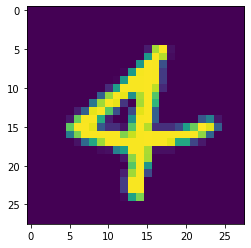

In [12]:
#visualization demo

#plt.figure(figsize=(4,4))
plt.imshow(images[150].reshape(28,28))
#plt.legend("")


In [13]:
cov = np.cov(images.T) #covariance matrix
eigvals, eigvecs = np.linalg.eig(cov)

index = eigvals.argsort()[::-1]  

eigvals = eigvals[index]
eigvecs = eigvecs[index,:]

In [14]:

"""
n=500 # number of principal components used
image_lowd = np.matmul(images,eigvecs[:n].T)
image_recon = np.real(np.matmul(image_lowd,eigvecs[:n]))
plt.imshow(image_recon[10].reshape(28,28));

"""

'\nn=500 # number of principal components used\nimage_lowd = np.matmul(images,eigvecs[:n].T)\nimage_recon = np.real(np.matmul(image_lowd,eigvecs[:n]))\nplt.imshow(image_recon[10].reshape(28,28));\n\n'

In [ ]:
fig = plt.figure()
ims = []

for  n in range(784):

    image_lowd = np.matmul(images,eigvecs[:n].T)
    image_recon = np.real(np.matmul(image_lowd,eigvecs[:n]))
    img = plt.imshow(image_recon[150].reshape(28,28))
    ims.append([img])
    
ani = animation.ArtistAnimation(fig, ims, interval=70, blit=True,
                                repeat_delay=1000)
    
#plt.show()
ani.save('mnist.mp4')